In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [44]:
path = kagglehub.dataset_download("erdemtaha/cancer-data")

print("Path to dataset files:", path)
dir_list = os.listdir(path)
dir_list


Path to dataset files: /kaggle/input/cancer-data


['Cancer_Data.csv']

In [45]:
df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')

In [46]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [48]:
df.shape

(569, 33)

In [49]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [53]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [54]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg = LogisticRegression()

In [58]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred = lg.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[64  5]
 [ 5 40]]


In [62]:
accuracy_score(y_test, pred)

0.9122807017543859

In [63]:
cm = confusion_matrix(y_test, pred)

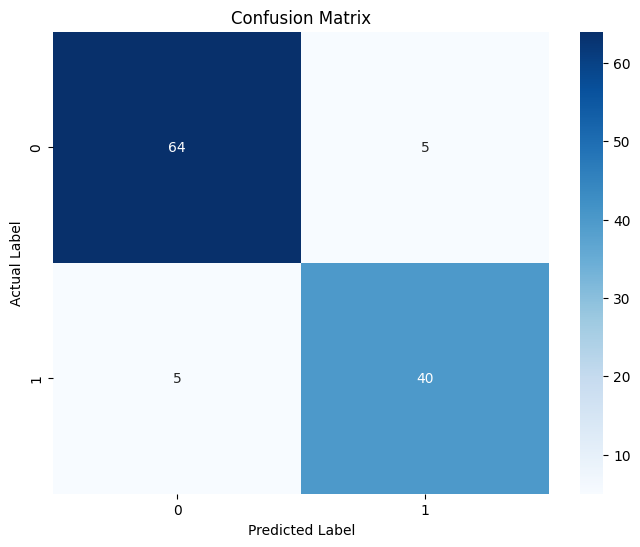

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [65]:
print("\nClassification Report:\n", classification_report(y_test, pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.89      0.89      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [66]:
xx = x.values
yy = y.values

<h1> Lets Drop Column and then see </h1>

In [67]:
df.shape

(569, 31)

In [68]:
dff = x.copy()

In [69]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)  # choose top 10 features
X_new = selector.fit_transform(x, y)

print("Selected Features Indexes:", selector.get_support(indices=True))

Selected Features Indexes: [ 0  1  2  3 12 13 20 21 22 23]


In [70]:
selected_indexes = [0, 1, 2, 3, 12, 13, 20, 21, 22, 23]

x_selected = dff.iloc[:, selected_indexes]

X_dropped = dff.drop(dff.columns.difference(dff.columns[selected_indexes]), axis=1)

print("Final Columns Shape:", x_selected.shape) #drop unnecessary columns

Final Columns Shape: (569, 10)


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [72]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
pre = lg.predict(x_test)

In [74]:
accuracy_score(y_test, pre) #Accuracy Improved

0.9210526315789473

In [75]:
cm = confusion_matrix(y_test, pre)

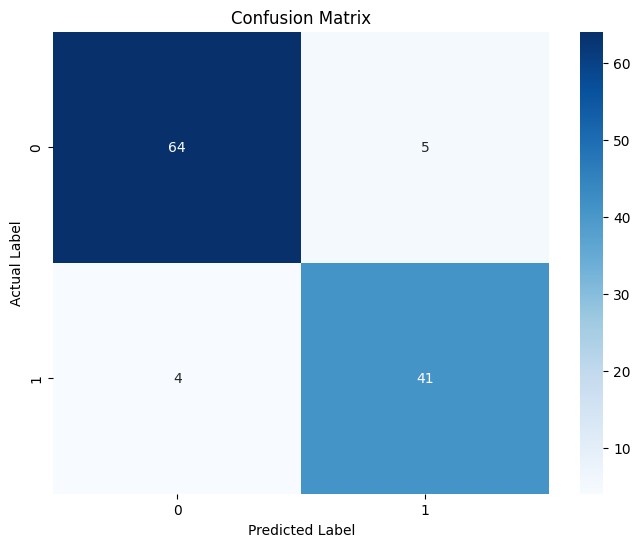

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()